In [1]:
import tensorflow as tf
import numpy as np

In [2]:
#loading mnist dataset
mnist = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
CNNmodel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=7, padding="valid",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Lambda(tf.nn.local_response_normalization),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="valid",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(128, kernel_size=3, padding="valid",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Lambda(tf.nn.local_response_normalization),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")


])

In [5]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-3)
CNNmodel.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                     restore_best_weights=True)

In [6]:
historyCNN = CNNmodel.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10


1719/1719 [==============================] - 27s 15ms/step - loss: 0.2197 - accuracy: 0.9308 - val_loss: 0.1125 - val_accuracy: 0.9672
Epoch 2/10
1719/1719 [==============================] - 25s 15ms/step - loss: 0.0988 - accuracy: 0.9701 - val_loss: 0.0551 - val_accuracy: 0.9844
Epoch 3/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0809 - accuracy: 0.9752 - val_loss: 0.0576 - val_accuracy: 0.9848
Epoch 4/10
1719/1719 [==============================] - 29s 17ms/step - loss: 0.0688 - accuracy: 0.9800 - val_loss: 0.0503 - val_accuracy: 0.9850
Epoch 5/10
1719/1719 [==============================] - 29s 17ms/step - loss: 0.0624 - accuracy: 0.9807 - val_loss: 0.0571 - val_accuracy: 0.9870
Epoch 6/10
1719/1719 [==============================] - 28s 16ms/step - loss: 0.0572 - accuracy: 0.9829 - val_loss: 0.0825 - val_accuracy: 0.9762
Epoch 7/10
1719/1719 [==============================] - 29s 17ms/step - loss: 0.0519 - accuracy: 0.9842 - val_loss: 0.0408

In [ ]:
#lets see what adding dropout does to simple MLP layers

CNNmodel2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=7, padding="valid",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Lambda(tf.nn.local_response_normalization),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="valid",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(128, kernel_size=3, padding="valid",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Lambda(tf.nn.local_response_normalization),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation="relu",
                          kernel_initializer="he_normal"),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax")


])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-3)
CNNmodel2.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                     restore_best_weights=True)

In [ ]:
historyCNN2 = CNNmodel2.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 24s 14ms/step - loss: 0.0528 - accuracy: 0.9849 - val_loss: 0.0342 - val_accuracy: 0.9904
Epoch 2/10
1719/1719 [==============================] - 24s 14ms/step - loss: 0.0493 - accuracy: 0.9863 - val_loss: 0.0474 - val_accuracy: 0.9892
Epoch 3/10
1719/1719 [==============================] - 24s 14ms/step - loss: 0.0482 - accuracy: 0.9863 - val_loss: 0.0371 - val_accuracy: 0.9908
Epoch 4/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0502 - accuracy: 0.9856 - val_loss: 0.0515 - val_accuracy: 0.9882
Epoch 5/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0433 - accuracy: 0.9878 - val_loss: 0.0338 - val_accuracy: 0.9922
Epoch 6/10
1719/1719 [==============================] - 24s 14ms/step - loss: 0.0434 - accuracy: 0.9876 - val_loss: 0.1001 - val_accuracy: 0.9934
Epoch 7/10
1719/1719 [==============================] - 25s 15ms/step - loss: 0.0397 - accuracy: 0.9882 - val_loss: 0.0299 -

In [13]:
CNNmodel2.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 7ms/step - loss: 0.0311 - accuracy: 0.9916


[0.031130239367485046, 0.991599977016449]

157/157 [==============================] - 1s 6ms/step


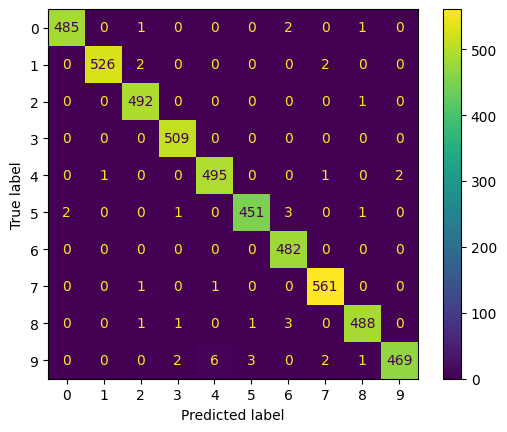

In [16]:
y_pred = CNNmodel2.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_valid, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
#lets do 5 more epochs
historyCNN2 = CNNmodel2.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))


In [ ]:
CNNmodel2.evaluate(X_valid, y_valid)


In [ ]:
y_pred2 = CNNmodel2.predict(X_valid)
y_pred_classes2 = np.argmax(y_pred, axis=1)



cm2 = confusion_matrix(y_valid, y_pred_classes2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()

In [ ]:
CNNmodel2.evaluate(X_test, y_test)